In [1]:
# Stop warnings
import warnings
warnings.filterwarnings("ignore")

# Imports
import os
import json
import cortex
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Personal imports
sys.path.append("{}/../../../utils".format(os.getcwd()))
from pycortex_utils import draw_cortex, set_pycortex_config_file, load_surface_pycortex, create_colormap, get_rois
from surface_utils import load_surface

In [2]:
# Directories
main_dir = '/Users/uriel/disks/meso_shared'
project_dir = 'RetinoMaps'

In [3]:
with open('../../../../{}/settings.json'.format(project_dir)) as f:
    json_s = f.read()
    analysis_info = json.loads(json_s)

In [4]:
# Set pycortex db and colormaps
cortex_dir = "{}/{}/derivatives/pp_data/cortex".format(main_dir, project_dir)
set_pycortex_config_file(cortex_dir)

# Webgl port
port_num = 25000

# Load data

In [5]:
# Settings 
subject = 'sub-01'

In [6]:
# Directories
data_dir = '/Users/uriel/Downloads/'

data_L_fn = '{}/{}_ses-01_task-rest_space-fsLR_den-170k_desc-full_corr_fisher-z_fdr_alpha1_L.shape.gii'.format(data_dir, subject)
data_R_fn = '{}/{}_ses-01_task-rest_space-fsLR_den-170k_desc-full_corr_fisher-z_fdr_alpha1_R.shape.gii'.format(data_dir, subject)


In [7]:
# Load data
img_L, data_L = load_surface(fn=data_L_fn)
img_R, data_R = load_surface(fn=data_L_fn)

In [8]:
# concat data 
data_brain = np.concatenate([data_L, data_R], axis=1)

# replace nan by 0 
data_brain = np.nan_to_num(data_brain, nan=0.0)

# Plot data 

In [16]:
subject = 'sub-11'
pycortex_subject = 'sub-170k'
save_svg = False


colormap_name = 'viridis' 
alpha_idx = 0 # !!!!! 
idx_2_plot = 0

here : /RetinoMaps/derivatives/pp_data/cortex/db/sub-170k you have differents overlays, the one withe the name overlays is the wich is plot. 
overlays : FEF and PEF borders
overlays_roi : fef and pef with glasser parcelation
overlays_all_rois : all mmp parcelation

just put _old on the overlays and remove the _... extention of the one you want

In [23]:
alpha_range = [0,0.01]

In [24]:
np.unique(data_brain[alpha_idx,...]**2)

array([0.0000000e+00, 2.3475436e-12, 1.0636714e-08, ..., 3.4093224e-02,
       3.4429103e-02, 3.4982871e-02], dtype=float32)

In [25]:
# check if it is what you want for alpha
alpha_data = data_brain[alpha_idx,...]**2
alpha = alpha_data
alpha = (alpha - alpha_range[0]) / (alpha_range[1] - alpha_range[0])
alpha[alpha>1]=1

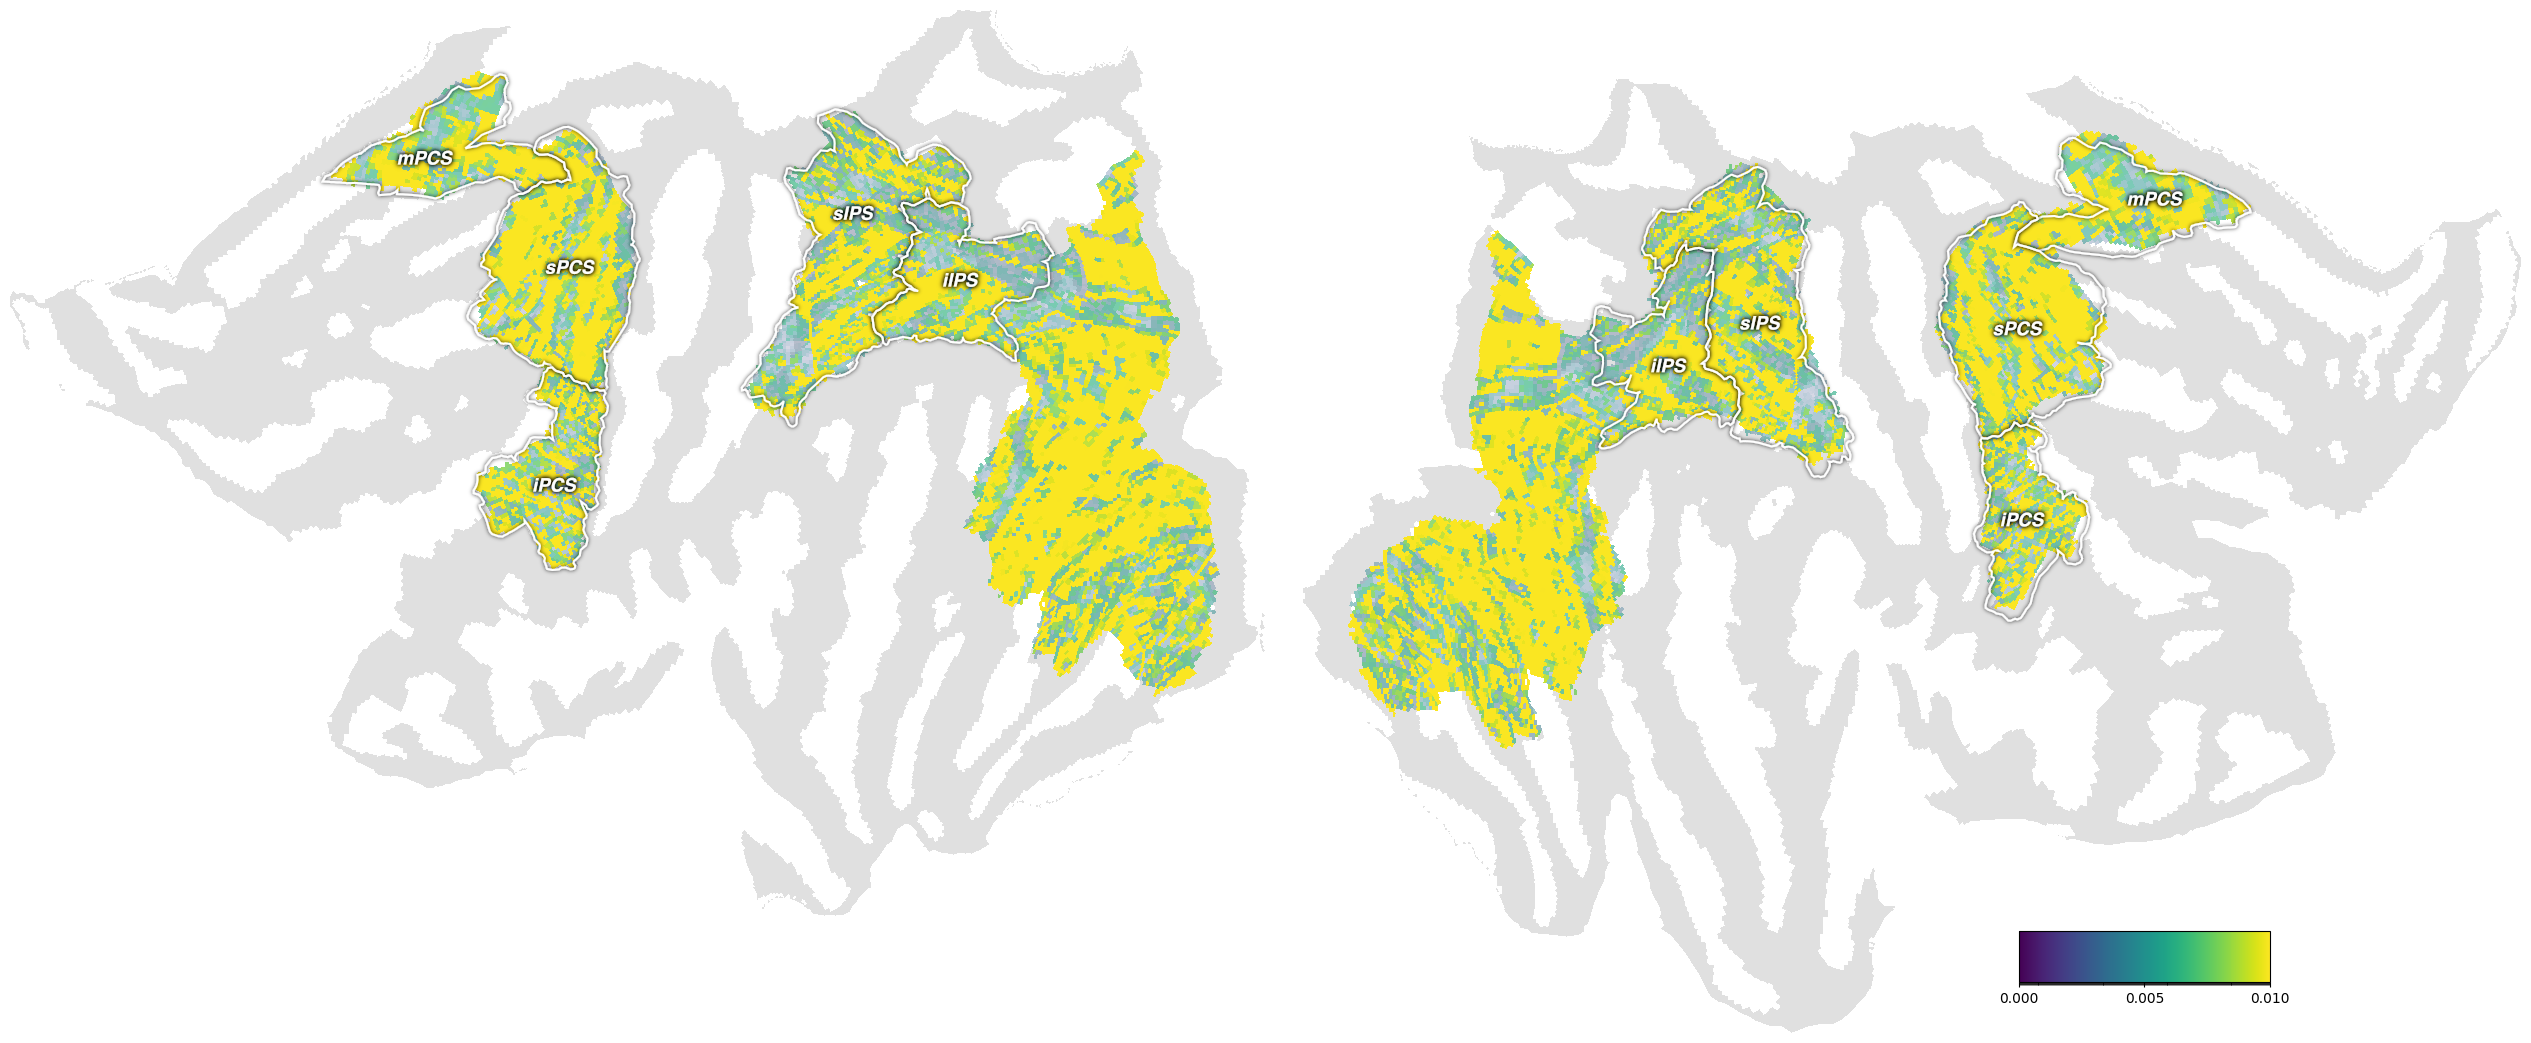

In [26]:
roi_name = 'XXX'
param_rois = {'subject': pycortex_subject,
              'data': data_brain[idx_2_plot,:]**2, 
              'cmap': colormap_name,
              'alpha': alpha,
              'cbar': 'discrete', 
              'vmin': 0,
              'vmax': 0.01,
              'cmap_steps': 255,
              'cortex_type': 'VertexRGB',
              'description': 'NAME',
              'curv_brightness': 1, 
              'curv_contrast': 0.25,
              'add_roi': save_svg,
              'with_labels': True,
              'roi_name': roi_name}

volume_roi = draw_cortex(**param_rois)

fig_dir = '/Users/uriel/Downloads'
# plt.savefig('{}/FIG_name.pdf'.format(fig_dir))

# WebGL

In [31]:
port_num = port_num + 1

# Remome overlays_visible=('sulci','roi'), to have borders 
print("Go to (in 5 s...): http://localhost:{}/".format(port_num))
handle = cortex.webgl.show(data=volume_roi,
                           recache=True,
                           port=port_num,
                           overlays_visible=('rois', 'sulci'), # Border to plots possible value 'roi', 'sulcis'
                           labels_visible=() # Labels to plot, possible value'roi', 'sulcis'
                          )

Go to (in 5 s...): http://localhost:25004/
Generating new ctm file...
wm
wm
inflated
inflated
Started server on port 25004
Stopping server
Stopping server
Stopping server


In [29]:
# Set view
inflated_general = {'camera.azimuth':241,
                    'camera.altitude':60,
                    'camera.radius':430,
                    'surface.{subject}.unfold':0,
                    'surface.{subject}.pivot':46,
                    'surface.{subject}.left':True,
                    'surface.{subject}.right':True,
                    'surface.{subject}.depth':0.5,
                    'surface.{subject}.specularity':0,
                    'surface.{subject}.layers':4,
                    'surface.{subject}.dither':False,
                    'surface.{subject}.colorbar':False,
                    'surface.{subject}.sampler':'nearest',
                    'surface.{subject}.curvature.brightness':0.25,
                    'surface.{subject}.curvature.contrast':0.25,
                    'surface.{subject}.curvature.smoothness':1}
handle._set_view(**inflated_general)

# save view
im1 = handle.getImage('{}/name.png'.format(fig_dir),size = (3000, 3000))